!pip install snscrape

## Pull from s3

In [2]:
# !pip3 install boto3
# !pip install s3fs

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import itertools

In [1]:
# #write to data folder

# !aws s3 cp --recursive s3://bigdatabuddies-glue-output ./Data

download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00001.csv to Data/run-1680588414414-part-r-00001.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00008.csv to Data/run-1680588414414-part-r-00008.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00000.csv to Data/run-1680588414414-part-r-00000.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00009.csv to Data/run-1680588414414-part-r-00009.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00005.csv to Data/run-1680588414414-part-r-00005.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00006.csv to Data/run-1680588414414-part-r-00006.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00010.csv to Data/run-1680588414414-part-r-00010.csv
download: s3://bigdatabuddies-glue-output/run-1680588414414-part-r-00007.csv to Data/run-1680588414414-part-r-00007.csv
download: s3://bigdatabuddies-glue-outpu

In [2]:
import os
import pandas as pd

folder_name = 'Data/'

# Get all CSV files in the folder
csv_files = [os.path.join(folder_name, f) for f in os.listdir(folder_name) if f.endswith('.csv')]

# Concatenate all CSV files into a single dataframe
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# Print the resulting dataframe
df


,datetime,id,text,username
0,2023-01-17 23:59:59+00:00,1615499204993994752,Verbl ffende KI Kleiner Test von ChatGPT vo...,Inno_Trends
1,2023-01-17 23:59:53+00:00,1615499179505188864,DestinLegarie To pay for ChatGPT,mr_musica
2,2023-01-17 23:59:50+00:00,1615499165429288961,AI is amazing ChatGPT https t co ToT cu RJ,Jamsterson
3,2023-01-17 23:59:45+00:00,1615499147599306752,I need to get hip to ChatGPT,AkanButNoJeezyy
4,2023-01-17 23:59:45+00:00,1615499143694413830,heyBarsee chatgptbot summarise what most cou...,seaninsound
...,...,...,...,...
5663206,2022-12-15 00:00:07+00:00,1603178051256299520,Why even meet people Might as well stay home ...,varunramg
5663207,2022-12-15 00:00:06+00:00,1603178045849841664,tremblayguy lordjim AndreeAnn QC tva...,BarbaTruc20
5663208,2022-12-15 00:00:04+00:00,1603178039541698560,Rails Ruby RC YARV ...,uniuni_engineer
5663209,2022-12-15 00:00:01+00:00,1603178025545179137,ChatGPT didn t have to go that hard but we re...,Peaze


In [17]:
df.to_csv('twitter_concat.csv", index=False)

## Preprocessing

In [9]:
import pandas as pd

In [8]:
df = pd.read_csv('twitter_concat.csv')


/tmp/ipykernel_1048/3107806598.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2_4_concat.csv')


In [11]:
# !pip install nltk

In [18]:
df.isna().sum()

datetime     0
id           0
text        51
username     0
dtype: int64

In [6]:
#For Preprocessing
import re    # RegEx for removing non-letter characters

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sys
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.parse.malt import MaltParser
from nltk.corpus import words
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

import html
from unicodedata import normalize

[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     bigdatabuddies/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jupyter-bigdatabuddies/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jupyter-
[nltk_data]     bigdatabuddies/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     bigdatabuddies/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/jupyter-
[nltk_data]     bigdatabuddies/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
def decode_text(text):
    # remove non-ASCII characters in string
    decoded_text = text.encode('ascii', 'ignore').decode('utf-8')

    # decode HTML entities
    decoded_html = html.unescape(decoded_text)
    return ''.join([word for word in decoded_html if word.isprintable()])

def remove_mentions(text):
    return re.sub("@[A-Za-z0-9_]+","", text)

def remove_stopwords(words_list):
    stop_list = stopwords.words("english")
    stop_list.append("filler")
    return [word for word in words_list if word not in stop_list]

def pos_to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_words(word_list):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    # POS (part-of-speech) tagging
    # nltk_tagged -> a list of tuples (word, pos tag)
    nltk_tagged = nltk.pos_tag(word_list)

    # returns a list of tuples of words and their wordnet_tag (after conversion from NLTK tag)
    wordnet_tagged = list(map(lambda x: (x[0], pos_to_wordnet(x[1])), nltk_tagged))

    # lemmatizing
    lemmatized_words = []
    for word, tag in wordnet_tagged:
        if tag is not None:
            # need POS tag as 2nd argument as it helps lemmatize the words more accurately
            lemmatized_words.append(lemmatizer.lemmatize(word, tag))
        elif tag in [wordnet.NOUN]:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

def clean_original_text(text):
    text = str(text)
    text = text.lower()
    clean_list = []
    sentence_list = nltk.sent_tokenize(text)
    for sentence in sentence_list:
        decoded_sentence = decode_text(sentence)
        words_list = nltk.RegexpTokenizer(r'\w+').tokenize(decoded_sentence)
        lemmatized_words = lemmatize_words(words_list)
        useful_words = remove_stopwords(lemmatized_words)

        if len(useful_words) > 0:
            clean_list.extend(useful_words)
    clean_text = ' '.join(clean_list)

    return clean_text

In [ ]:
df['clean_text'] = df['text'].apply(clean_original_text)
df['clean_tokens'] = df['text'].apply(nltk.word_tokenize)



In [ ]:
df

In [ ]:
df.to_csv("twitter_preprocessed.csv", index=False)

## Vader Sentiment Analysis

In [3]:
#use preprocessed text

df = pd.read_csv('4_Apr_preprocessed.csv')

/tmp/ipykernel_1163/198264218.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('4_Apr_preprocessed.csv')


In [4]:
# df = pd.read_csv("twitter_preprocessed.csv")
df = df.astype(str)

df.head()

,datetime,id,text,username,clean_text
0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...
1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...
2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...
3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...
4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...


In [8]:
df.isna().sum()

datetime      0
id            0
text          0
username      0
clean_text    0
dtype: int64

In [9]:
## VADER


nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /home/jupyter-
[nltk_data]     bigdatabuddies/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# NLTK VADER for sentiment analysis

# New words and values
# New words and values
new_words = {
    'easy-to-use': 10,
    'productive': 5,
    'slow': -5,
    'frustrating': -10,
    'glitchy': -100,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

print('ok!')

In [11]:

# Iterate through the headlines and get the polarity scores
scores = df['clean_text'].apply(vader.polarity_scores)

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame.from_records(scores)

# Join the DataFrames
scored_tweets = df.join(scores_df)
scored_tweets.head()

,datetime,id,text,username,clean_text,neg,neu,pos,compound
0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...,0.000,1.000,0.000,0.0000
1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...,0.000,1.000,0.000,0.0000
2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...,0.237,0.763,0.000,-0.4215
3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...,0.000,1.000,0.000,0.0000
4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...,0.000,0.878,0.122,0.3612


In [16]:
scored_tweets.to_csv("4_Apr_vader.csv", index= False)

### Add week, month, and sentiment columns


In [2]:
scored_tweets = pd.read_csv('4_Apr_vader.csv')
# scored_tweets = scored_tweets.drop('Unnamed: 0', axis = 1)
scored_tweets.head()

/tmp/ipykernel_936/921656587.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  scored_tweets = pd.read_csv('4_Apr_vader.csv')


,datetime,id,text,username,clean_text,neg,neu,pos,compound
0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...,0.000,1.000,0.000,0.0000
1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...,0.000,1.000,0.000,0.0000
2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...,0.237,0.763,0.000,-0.4215
3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...,0.000,1.000,0.000,0.0000
4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...,0.000,0.878,0.122,0.3612


In [3]:
scored_tweets['datetime'] = pd.to_datetime(scored_tweets['datetime'])

In [5]:
# scored_tweets = scored_tweets.dropna(subset=['clean_text'])
scored_tweets['month'] = scored_tweets['datetime'].apply(lambda x: x.month)
scored_tweets['datetime1']= scored_tweets['datetime'].astype('str')

scored_tweets['week'] = scored_tweets['datetime1'].apply(lambda x: x[:10])
# scored_tweets['week'] = scored_tweets['datetime'].dt.to_period('W').dt.start_time

def get_sentiment(x):
    if x>0:
        return 'positive'
    elif x ==0:
        return 'neutral'
    else:
        return 'negative'

scored_tweets['sentiment'] = scored_tweets['compound'].apply(lambda x: get_sentiment(x))

scored_tweets


,datetime,id,text,username,clean_text,neg,neu,pos,compound,month,datetime1,week,sentiment
0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:58+00:00,2022-12-01,neutral
1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:56+00:00,2022-12-01,neutral
2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...,0.237,0.763,0.000,-0.4215,12,2022-12-01 23:59:37+00:00,2022-12-01,negative
3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:26+00:00,2022-12-01,neutral
4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...,0.000,0.878,0.122,0.3612,12,2022-12-01 23:59:20+00:00,2022-12-01,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663206,2022-11-09 00:00:50+00:00,1590132269255114753,Reduce cost and improve query performance with...,tweepy20220507,reduce cost improve query performance amazon a...,0.000,0.705,0.295,0.5574,11,2022-11-09 00:00:50+00:00,2022-11-09,positive
5663207,2022-11-09 00:00:36+00:00,1590132210715303936,Enable cross account queries on AWS CloudTrail...,tweepy20220507,enable cross account queries aws cloudtrail la...,0.000,1.000,0.000,0.0000,11,2022-11-09 00:00:36+00:00,2022-11-09,neutral
5663208,2022-11-09 00:00:12+00:00,1590132106260353024,If you want to generate more leads create con...,PirenneSalvor,want generate leads create content answers cus...,0.000,0.581,0.419,0.6369,11,2022-11-09 00:00:12+00:00,2022-11-09,positive
5663209,2022-11-09 00:00:03+00:00,1590132069069619200,AnnaTynan Yes bc we share an inbox I am lu...,ceciliaclyra,annatynan yes bc share inbox lucky get see que...,0.000,0.510,0.490,0.7717,11,2022-11-09 00:00:03+00:00,2022-11-09,positive


In [9]:
scored_tweets.to_csv("4_apr_week_month_sentiment.csv")

### Monthly scores

In [10]:
# scored_tweets['datetime'] = pd.to_datetime(scored_tweets['datetime'])
# type(scored_tweets['datetime'][0])

In [62]:
# scored_tweets = scored_tweets.iloc[:, 2:]


In [12]:
# scored_tweets['month'] = scored_tweets['datetime'].dt.month
scored_tweets['month'].value_counts()

1     2178252
12    1546406
3      862857
2      840291
11     235383
4          22
Name: month, dtype: int64

In [13]:
monthly_scores = scored_tweets.groupby('month')[['neg', 'neu', 'pos', 'compound']].mean()
monthly_scores

,neg,neu,pos,compound
month,,,,
1,0.068551,0.783825,0.147221,0.149693
2,0.094705,0.699285,0.205565,0.199055
3,0.094214,0.699626,0.205507,0.199764
4,0.088273,0.835318,0.076364,-0.015945
11,0.051879,0.736268,0.211854,0.347769
12,0.066142,0.776530,0.157013,0.169427


### Weekly Scores

In [14]:
# scored_tweets['datetime'] = pd.to_datetime(scored_tweets['datetime'])
# scored_tweets = scored_tweets.iloc[:, 2:]
# scored_tweets['week'] = scored_tweets['datetime'].dt.to_period('W').dt.start_time

weekly_scores = scored_tweets.groupby('week')[['neg', 'neu', 'pos', 'compound']].mean()
weekly_scores


,neg,neu,pos,compound
week,,,,
2022-11-01,0.053247,0.738738,0.208021,0.332847
2022-11-02,0.053988,0.744558,0.201455,0.325335
2022-11-03,0.053867,0.730161,0.215968,0.353080
2022-11-04,0.050183,0.739093,0.210724,0.341306
2022-11-05,0.051420,0.736341,0.212234,0.341200
...,...,...,...,...
2023-03-29,0.123403,0.662071,0.214522,0.153198
2023-03-30,0.075037,0.686116,0.238495,0.270806
2023-03-31,0.110940,0.679582,0.209484,0.157063


### Daily scores

In [15]:
#temp to test
scored_tweets = pd.read_csv('4_apr_week_month_sentiment.csv')
scored_tweets

/tmp/ipykernel_936/2608273080.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  scored_tweets = pd.read_csv('4_apr_week_month_sentiment.csv')


,Unnamed: 0,datetime,id,text,username,clean_text,neg,neu,pos,compound,month,datetime1,week,sentiment
0,0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:58+00:00,2022-12-01,neutral
1,1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:56+00:00,2022-12-01,neutral
2,2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...,0.237,0.763,0.000,-0.4215,12,2022-12-01 23:59:37+00:00,2022-12-01,negative
3,3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:26+00:00,2022-12-01,neutral
4,4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...,0.000,0.878,0.122,0.3612,12,2022-12-01 23:59:20+00:00,2022-12-01,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663206,5663206,2022-11-09 00:00:50+00:00,1590132269255114753,Reduce cost and improve query performance with...,tweepy20220507,reduce cost improve query performance amazon a...,0.000,0.705,0.295,0.5574,11,2022-11-09 00:00:50+00:00,2022-11-09,positive
5663207,5663207,2022-11-09 00:00:36+00:00,1590132210715303936,Enable cross account queries on AWS CloudTrail...,tweepy20220507,enable cross account queries aws cloudtrail la...,0.000,1.000,0.000,0.0000,11,2022-11-09 00:00:36+00:00,2022-11-09,neutral
5663208,5663208,2022-11-09 00:00:12+00:00,1590132106260353024,If you want to generate more leads create con...,PirenneSalvor,want generate leads create content answers cus...,0.000,0.581,0.419,0.6369,11,2022-11-09 00:00:12+00:00,2022-11-09,positive
5663209,5663209,2022-11-09 00:00:03+00:00,1590132069069619200,AnnaTynan Yes bc we share an inbox I am lu...,ceciliaclyra,annatynan yes bc share inbox lucky get see que...,0.000,0.510,0.490,0.7717,11,2022-11-09 00:00:03+00:00,2022-11-09,positive


In [16]:
import pandas as pd
from pytz import timezone

# Convert 'Datetime' column to datetime type (assuming it's in UTC)
scored_tweets['datetime'] = pd.to_datetime(scored_tweets['datetime'], utc=True)


In [17]:
# Set 'Datetime' column as index (still timezone-aware)
scored_tweets.set_index('datetime', inplace=True)

# Convert index to timezone-naive
scored_tweets.index = scored_tweets.index.tz_localize(None)

In [18]:

# Calculate daily averages and create new dataframe
df_daily = scored_tweets.resample('D').mean()


/tmp/ipykernel_936/87669421.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = scored_tweets.resample('D').mean()


In [19]:
# Add 'Date' column to new dataframe
df_daily['Date'] = df_daily.index.date

# Reset index (index is still timezone-naive)
df_daily.reset_index(drop=True, inplace=True)


In [20]:

# Reorder columns
df_daily = df_daily[['Date', 'neg', 'neu', 'pos', 'compound']]
df_daily


,Date,neg,neu,pos,compound
0,2022-11-01,0.053247,0.738738,0.208021,0.332847
1,2022-11-02,0.053988,0.744558,0.201455,0.325335
2,2022-11-03,0.053867,0.730161,0.215968,0.353080
3,2022-11-04,0.050183,0.739093,0.210724,0.341306
4,2022-11-05,0.051420,0.736341,0.212234,0.341200
...,...,...,...,...,...
148,2023-03-29,0.123403,0.662071,0.214522,0.153198
149,2023-03-30,0.075037,0.686116,0.238495,0.270806
150,2023-03-31,0.110940,0.679582,0.209484,0.157063
151,2023-04-01,0.080545,0.838818,0.080545,-0.014073


In [22]:
df_daily.isna().sum()

Date        0
neg         0
neu         0
pos         0
compound    0
dtype: int64

In [23]:
df_daily.to_csv('4_apr_daily_score.csv', index="False")

In [24]:

df_daily.to_json('4_apr_daily_score.json', orient='records')

In [ ]:
# !pip install matplotlib

<Axes: >

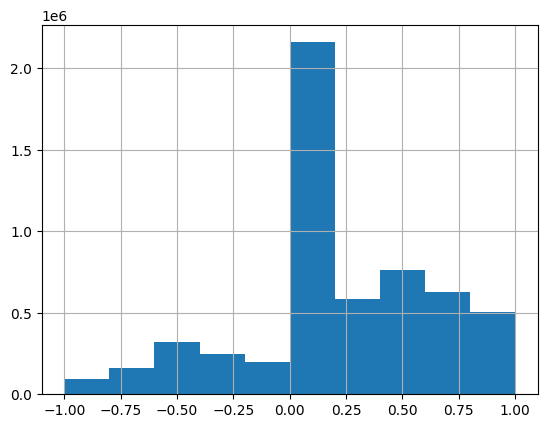

In [25]:
scored_tweets['compound'].hist()

## Bar Chart for Sentiment

In [19]:
#temp to test
df = pd.read_csv('4_apr_week_month_sentiment.csv')
df.head()

/tmp/ipykernel_969/1837701289.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('4_apr_week_month_sentiment.csv')


,Unnamed: 0,datetime,id,text,username,clean_text,neg,neu,pos,compound,month,datetime1,week,sentiment
0,0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:58+00:00,2022-12-01,neutral
1,1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:56+00:00,2022-12-01,neutral
2,2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...,0.237,0.763,0.000,-0.4215,12,2022-12-01 23:59:37+00:00,2022-12-01,negative
3,3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:26+00:00,2022-12-01,neutral
4,4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...,0.000,0.878,0.122,0.3612,12,2022-12-01 23:59:20+00:00,2022-12-01,positive


### whole dataset

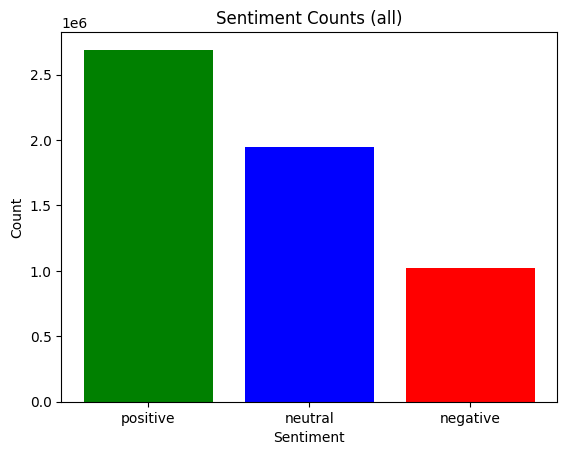

In [27]:
import matplotlib.pyplot as plt

def create_plot(temp_df):

    # Get the count of each sentiment
    sentiment_counts = temp_df['sentiment'].value_counts()

    # Define colors for each sentiment
    colors = {'positive': 'green', 'neutral': 'blue', 'negative': 'red'}

    # Create a bar plot of the sentiment counts
    plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[s] for s in sentiment_counts.index])

    # Set the x-axis label
    plt.xlabel('Sentiment')

    # Set the y-axis label
    plt.ylabel('Count')

    # Set the title of the plot
    plt.title('Sentiment Counts (all)')

    # Show the plot
    
create_plot(df)


### months

In [20]:
months = list(df['month'].unique())
months

[12, 1, 11, 2, 3, 4]

In [21]:
def get_month(i):
    if i==0:
        return 'Nov'
    elif i==1:
        return 'Dec'
    elif i==2:
        return "Jan"
    elif i==3:
        return "Feb"
    elif i==4:
        return "Mar"
    elif i==5:
        return 'April'


In [22]:
import matplotlib.pyplot as plt

df1 = df[df['month']==1]
df2 = df[df['month']==2]
df3 = df[df['month']==3]
df4 = df[df['month']==4]
df11 = df[df['month']==11]
df12 = df[df['month']==12]

def get_month(i):
    if i==0:
        return 'Nov'
    elif i==1:
        return 'Dec'
    elif i==2:
        return "Jan"
    elif i==3:
        return "Feb"
    elif i==4:
        return "Mar"
    elif i==5:
        return "April"

In [23]:
# # df12
# df_list = [df11, df12, df1, df2, df3, df4]
# for i, df in enumerate(df_list):
#     month = get_month(i)
#     print(i)
#     print(month)

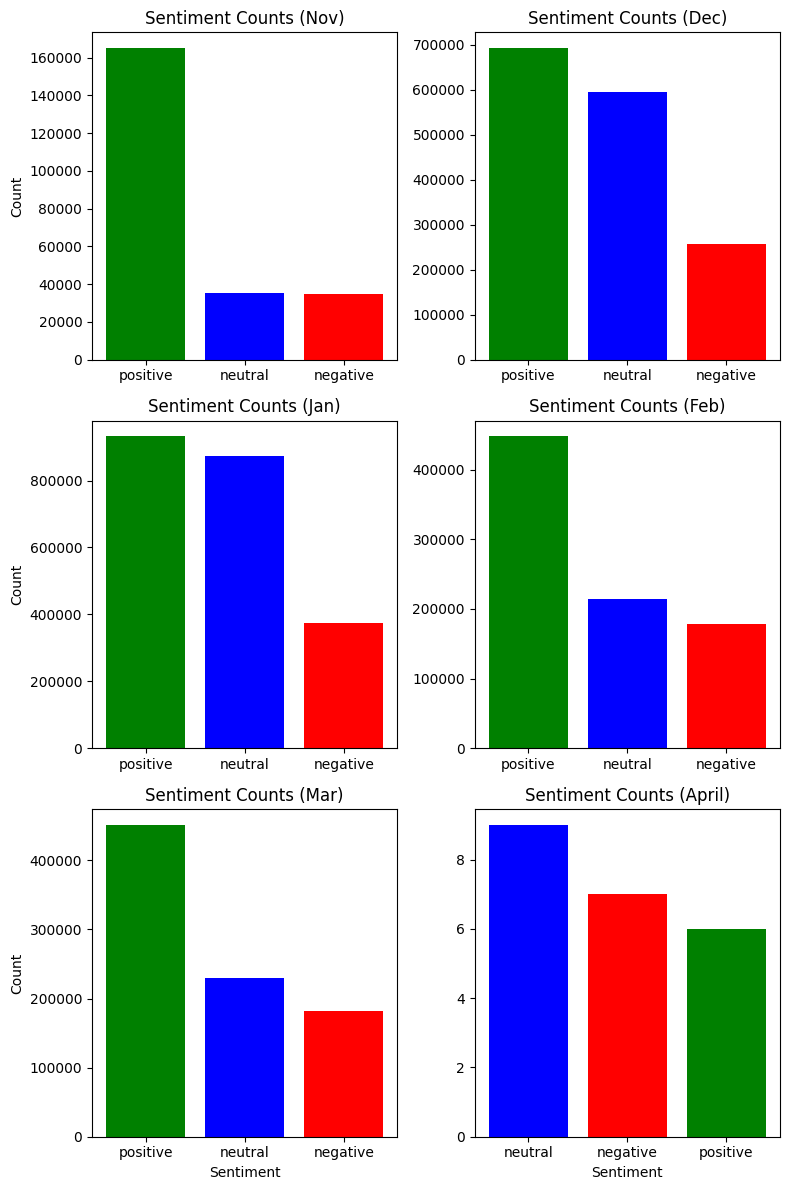

In [24]:
# Define a list of dataframes for each plot
df_list = [df11, df12, df1, df2, df3, df4]

# Define the grid layout
num_plots = len(df_list)
grid_cols = 2
grid_rows = -(-num_plots // grid_cols)  # ceiling division

# Create the plot grid
fig, axes = plt.subplots(nrows=grid_rows, ncols=grid_cols, figsize=(8, 4*grid_rows))

# Flatten the 2D array of axes objects into a 1D array
axes = axes.flatten()

# Loop over each plot and create a bar chart on a subplot
for i, df in enumerate(df_list):
    # Get the count of each sentiment
    sentiment_counts = df['sentiment'].value_counts()

    # Define colors for each sentiment
    colors = {'positive': 'green', 'neutral': 'blue', 'negative': 'red'}

    # Create a bar plot of the sentiment counts
    axes[i].bar(sentiment_counts.index, sentiment_counts.values, color=[colors[s] for s in sentiment_counts.index])

    month = get_month(i)
    # Set the title of the plot
    axes[i].set_title('Sentiment Counts ({})'.format(month))

# Set the x-axis label for the bottom row of plots
for ax in axes[-grid_cols:]:
    ax.set_xlabel('Sentiment')

# Set the y-axis label for the left column of plots
for i in range(0, num_plots, grid_cols):
    axes[i].set_ylabel('Count')

# Add space between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Topic modelling

In [2]:
import mglearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from datetime import datetime

In [3]:
df = pd.read_csv('4_apr_week_month_sentiment.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

/tmp/ipykernel_5615/2791012245.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('4_apr_week_month_sentiment.csv')


,datetime,id,text,username,clean_text,neg,neu,pos,compound,month,datetime1,week,sentiment
0,2022-12-01 23:59:58+00:00,1598466969141137408,The new ChatGPT model by OpenAI is astonishi...,askviable,new chatgpt model openai astonishing humanizes...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:58+00:00,2022-12-01,neutral
1,2022-12-01 23:59:56+00:00,1598466963466252288,bitquark I am looking forward for a ChatGPT A...,mazen160,bitquark looking forward chatgpt api see lot t...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:56+00:00,2022-12-01,neutral
2,2022-12-01 23:59:37+00:00,1598466881761218560,i think i broke chatGPT it s been frozen for ...,ZoumanaCisse6,think broke chatgpt frozen couple minutes co h...,0.237,0.763,0.000,-0.4215,12,2022-12-01 23:59:37+00:00,2022-12-01,negative
3,2022-12-01 23:59:26+00:00,1598466834776600576,YanoTomo aizu sniper yae AI Ch...,papakichi111,yanotomo aizu sniper yae ai chatgpt worldcup c...,0.000,1.000,0.000,0.0000,12,2022-12-01 23:59:26+00:00,2022-12-01,neutral
4,2022-12-01 23:59:20+00:00,1598466812198387712,I like ChatGPT as much as the next guy but th...,DennisLibre,like chatgpt much next guy nothing else twitte...,0.000,0.878,0.122,0.3612,12,2022-12-01 23:59:20+00:00,2022-12-01,positive


In [4]:
df.dropna(subset=['clean_text'], inplace=True)
df.dropna(subset=['text'], inplace=True)


In [5]:
df.isna().sum()

datetime      0
id            0
text          0
username      0
clean_text    0
neg           0
neu           0
pos           0
compound      0
month         0
datetime1     0
week          0
sentiment     0
dtype: int64

### Topic modelling for entire dataset

In [9]:
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# import mglearn
import matplotlib.pyplot as plt
import numpy as np

In [10]:
vect = CountVectorizer(max_features=100, max_df=.15, stop_words='english')
X = vect.fit_transform(df["clean_text"])

topics = 2
lda = LatentDirichletAllocation(n_components = topics, learning_method="batch", max_iter=5, random_state=0)
document_topics = lda.fit_transform(X)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       
--------      --------      
ai            like          
openai        people        
make          query         
write         gpt           
use           chat          
way           google        
ask           prompt        
using         work          
answer        use           
think         know          




/home/jupyter-bigdatabuddies/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
import json
import mglearn

# assume that the LDA model has already been trained and the topics have been printed using mglearn.tools.print_topics()
topics_json = {}
topics = 2
feature_names = np.array(vect.get_feature_names())
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
for topic_idx, topic in enumerate(lda.components_):
    top_features = [feature_names[i] for i in sorting[topic_idx, :10]]
    topics_json[f"Topic {topic_idx}"] = top_features

# write the topics to a JSON file
with open('4_Apr_All_topics.json', 'w') as f:
    json.dump(topics_json, f)


seems like 2 topics are :
topic 0: 
topic 1: 

In [12]:
# df.to_csv(f'tweets-{date}-topic-scores.csv', index = False)

### Plot distribution

### Topic Modelling for Sentiment

In [13]:
sentiment_list = list(df['sentiment'].unique())
sentiment_list

['neutral', 'negative', 'positive']

In [14]:
def lda_sentiment(df, sentiment):
    # CountVectorizer to create a document-term matrix
    vect = CountVectorizer(max_features=100, max_df=.15, stop_words='english')
    X = vect.fit_transform(df["clean_text"])

    # LatentDirichletAllocation to fit LDA model
    topics = 2
    lda = LatentDirichletAllocation(n_components=topics, learning_method="batch", max_iter=5, random_state=0)
    document_topics = lda.fit_transform(X)

    # Sort and print the top words in each topic
    sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
    feature_names = np.array(vect.get_feature_names())

#     mglearn.tools.print_topics(topics=range(topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

    # Create dictionary with date and topics as values
    topics_dict = {}
    current_sentiment = sentiment

    for topic_idx, topic in enumerate(lda.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        topics_dict[f"Topic {topic_idx}"] = top_features
        
    print(topics_dict)
        
    return topics_dict


def get_sentiment_lda(df):
    dict_list = []
    output_topics = {}
    for sentiment in sentiment_list: #positive, neutral, negative
        print("sentiment", sentiment)
        sentiment_data = df.loc[df["sentiment"] == sentiment]
        sentiment_dict = lda_sentiment(sentiment_data, sentiment)
        dict_list.append(sentiment_dict)
    for i, dict_to_append in enumerate(dict_list):
        # Use the index i as the key for each dictionary in the appended_dict
        key = sentiment_list[i]
        output_topics[key] = dict_to_append
        
    return output_topics
        


In [15]:
sentiment_topics = get_sentiment_lda(df)
sentiment_topics

sentiment neutral
{'Topic 0': ['ai', 'gpt', 'chat', 'openai', 'write', 'ask', 'using', 'prompt', 'think', 'microsoft'], 'Topic 1': ['que', 'la', 'google', 'use', 'query', 'el', 'es', 'png', 'est', 'le']}
sentiment negative
{'Topic 0': ['ai', 'people', 'think', 'way', 'time', 'like', 'use', 'write', 'prompt', 'using'], 'Topic 1': ['gpt', 'like', 'wrong', 'google', 'chat', 'query', 'want', 'make', 'going', 'right']}
sentiment positive
{'Topic 0': ['ai', 'think', 'people', 'use', 'know', 'way', 'want', 'better', 'answer', 'code'], 'Topic 1': ['query', 'make', 'prompt', 'openai', 'using', 'gpt', 'help', 'chat', 'good', 'use']}


{'neutral': {'Topic 0': ['ai',
   'gpt',
   'chat',
   'openai',
   'write',
   'ask',
   'using',
   'prompt',
   'think',
   'microsoft'],
  'Topic 1': ['que',
   'la',
   'google',
   'use',
   'query',
   'el',
   'es',
   'png',
   'est',
   'le']},
 'negative': {'Topic 0': ['ai',
   'people',
   'think',
   'way',
   'time',
   'like',
   'use',
   'write',
   'prompt',
   'using'],
  'Topic 1': ['gpt',
   'like',
   'wrong',
   'google',
   'chat',
   'query',
   'want',
   'make',
   'going',
   'right']},
 'positive': {'Topic 0': ['ai',
   'think',
   'people',
   'use',
   'know',
   'way',
   'want',
   'better',
   'answer',
   'code'],
  'Topic 1': ['query',
   'make',
   'prompt',
   'openai',
   'using',
   'gpt',
   'help',
   'chat',
   'good',
   'use']}}

In [17]:
# Convert the dictionary to a JSON string
json_string = json.dumps(sentiment_topics)

# Save the JSON string to a file
with open("4_Apr_sentiment_topics.json", "w") as outfile:
    outfile.write(json_string)

### Topic Modelling for Months

In [6]:
months = list(df['month'].unique())
months

[12, 1, 11, 2, 3, 4]

In [7]:
def lda_month(df, month):
    # CountVectorizer to create a document-term matrix
    vect = CountVectorizer(max_features=100, max_df=.15, stop_words='english')
    X = vect.fit_transform(df["clean_text"])

    # LatentDirichletAllocation to fit LDA model
    topics = 2
    lda = LatentDirichletAllocation(n_components=topics, learning_method="batch", max_iter=5, random_state=0)
    document_topics = lda.fit_transform(X)

    # Sort and print the top words in each topic
    sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
    feature_names = np.array(vect.get_feature_names())

#     mglearn.tools.print_topics(topics=range(topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

    # Create dictionary with date and topics as values
    topics_dict = {}
    current_time = month

    for topic_idx, topic in enumerate(lda.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        topics_dict[f"Topic {topic_idx}"] = top_features
        
    print(topics_dict)
        
    return topics_dict


def get_montly_lda(df):
    dict_list = []
    output_topics = {}
    for month in months: #1, 2, 3, 12
        print("month", month)
        month_data = df.loc[df["month"] == month]
        month_dict = lda_month(month_data, month)
        dict_list.append(month_dict)
        
    print(dict_list)
    for i, dict_to_append in enumerate(dict_list):
        # Use the index i as the key for each dictionary in the appended_dict
        key = months[i]
        output_topics[key] = dict_to_append
        
    return output_topics
        



In [8]:
topics_dict = get_montly_lda(df)
topics_dict

month 12


/home/jupyter-bigdatabuddies/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'Topic 0': ['ai', 'google', 'use', 'good', 'people', 'make', 'asked', 'write', 'new', 'work'], 'Topic 1': ['like', 'openai', 'gpt', 'chat', 'code', 'time', 'prompt', 'way', 'dan', 'que']}
month 1
{'Topic 0': ['ai', 'like', 'make', 'people', 'google', 'use', 'using', 'know', 'write', 'way'], 'Topic 1': ['gpt', 'chat', 'openai', 'prompt', 'work', 'used', 'use', 'code', 'want', 'time']}
month 11
{'Topic 0': ['team', 'request', 'customer', 'like', 'reach', 'data', 'support', 'message', 'response', 'need'], 'Topic 1': ['dm', 'help', 'contact', 'number', 'assist', 'thanks', 'kindly', 'thank', 'today', 'know']}
month 2
{'Topic 0': ['ai', 'query', 'dan', 'people', 'time', 'like', 'prompt', 'make', 'way', 'want'], 'Topic 1': ['chatgpt', 'like', 'use', 'queries', 'bing', 'think', 'using', 'good', 'chat', 'people']}
month 3
{'Topic 0': ['ai', 'chatgpt', 'like', 'people', 'make', 'prompt', 'think', 'use', 'new', 'model'], 'Topic 1': ['like', 'gpt', 'query', 'know', 'time', 'people', 'use', 'chat'

{12: {'Topic 0': ['ai',
   'google',
   'use',
   'good',
   'people',
   'make',
   'asked',
   'write',
   'new',
   'work'],
  'Topic 1': ['like',
   'openai',
   'gpt',
   'chat',
   'code',
   'time',
   'prompt',
   'way',
   'dan',
   'que']},
 1: {'Topic 0': ['ai',
   'like',
   'make',
   'people',
   'google',
   'use',
   'using',
   'know',
   'write',
   'way'],
  'Topic 1': ['gpt',
   'chat',
   'openai',
   'prompt',
   'work',
   'used',
   'use',
   'code',
   'want',
   'time']},
 11: {'Topic 0': ['team',
   'request',
   'customer',
   'like',
   'reach',
   'data',
   'support',
   'message',
   'response',
   'need'],
  'Topic 1': ['dm',
   'help',
   'contact',
   'number',
   'assist',
   'thanks',
   'kindly',
   'thank',
   'today',
   'know']},
 2: {'Topic 0': ['ai',
   'query',
   'dan',
   'people',
   'time',
   'like',
   'prompt',
   'make',
   'way',
   'want'],
  'Topic 1': ['chatgpt',
   'like',
   'use',
   'queries',
   'bing',
   'think',
   'using'

In [10]:
import json

In [11]:
new_topics_dict = {}
for key in topics_dict:
    new_topics_dict[str(key)] = topics_dict[key]

# Convert the dictionary to a JSON string
json_string = json.dumps(new_topics_dict)

# Save the JSON string to a file
with open("4_Apr_month_topics.json", "w") as outfile:
    outfile.write(json_string)